# Importing Required Libraries:

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

from collections import Counter 
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data collection and Analysis

In [81]:
df = pd.read_csv(r"C:\Users\RNARESHD\OneDrive - Capgemini\Desktop\AIML\DS_DF_WQI_Train.csv")
df.head()

,SMPLDATETIME,STNCODE,USRCODES,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class
0,01-01-2004 00:00,deldswq,00:00:00,5.2,0.13,0.1,101.9,12.9,0.45,6.6,0.012,12.639779,Excellent
1,01-01-2004 00:30,deldswq,00:30:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.013,12.636899,Excellent
2,01-01-2004 01:00,deldswq,01:00:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.012,12.631159,Excellent
3,01-01-2004 01:30,deldswq,01:30:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.013,12.349211,Excellent
4,01-01-2004 02:00,deldswq,02:00:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.012,12.343470,Excellent


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33138 entries, 0 to 33137
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SMPLDATETIME  33138 non-null  object 
 1   STNCODE       33138 non-null  object 
 2   USRCODES      33138 non-null  object 
 3   Temp          33138 non-null  float64
 4   SpCond        33138 non-null  float64
 5   Sal           33138 non-null  float64
 6   DO_pct        33138 non-null  float64
 7   DO_mgl        33138 non-null  float64
 8   Depth         33138 non-null  float64
 9   pH            33138 non-null  float64
 10  Turb          33138 non-null  float64
 11  WQI           33138 non-null  float64
 12  WQI_Class     33138 non-null  object 
dtypes: float64(9), object(4)
memory usage: 3.3+ MB


In [167]:
df.shape

(33138, 14)

# EDA

In [83]:
##Check numberic feature:
numeric_features=[feature for feature in df.columns if df[feature].dtype!="O"]
numeric_features

['Temp', 'SpCond', 'Sal', 'DO_pct', 'DO_mgl', 'Depth', 'pH', 'Turb', 'WQI']

In [84]:
##Discrete Feature
Discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<25]
Discrete_features
#print("Discrete_features",len(Discrete_features))
print("Discrete variable count :{}".format(len(Discrete_features)))


Discrete variable count :1


In [85]:
##Continous Features:
continous_features = [feature for feature in numeric_features if feature not in Discrete_features]
continous_features

['Temp', 'SpCond', 'DO_pct', 'DO_mgl', 'Depth', 'pH', 'Turb', 'WQI']

In [86]:
##lets check categorical feature
categorical_feature=[feature for feature in df.columns if df[feature].dtype=="O"]
categorical_feature

['SMPLDATETIME', 'STNCODE', 'USRCODES', 'WQI_Class']

In [87]:
#Here we to trying split "SMPLDATETIME" column in date and tine
df['SMPLDATETIME']=pd.to_datetime(df['SMPLDATETIME'])

In [88]:
df['Time'],df['Date']= df['SMPLDATETIME'].apply(lambda x:x.time()), df['SMPLDATETIME'].apply(lambda x:x.date())

In [89]:
# here delete the "USRCODES" and "STNCODE" and "Sal" column because its having a same data.
#
df.drop(['SMPLDATETIME','USRCODES','STNCODE','Sal'],axis=1,inplace=True)

In [90]:
#df

In [91]:
cat_features=df.select_dtypes(include='object')
cat_features.sample(5)

,WQI_Class,Time,Date
32926,Excellent,15:00:00,2006-02-20
25160,Good,20:00:00,2005-11-09
27351,Excellent,11:30:00,2005-10-27
18749,Excellent,06:30:00,2005-01-05
27955,Excellent,01:30:00,2005-09-11


In [93]:
numeric_features=df.select_dtypes(include='float')
numeric_features.sample(5)

,Temp,SpCond,DO_pct,DO_mgl,Depth,pH,Turb,WQI
3635,23.9,0.16,90.6,7.6,0.45,7.200000,0.007,27.847917
7547,26.7,0.15,65.7,5.3,0.17,6.800000,0.009,34.137931
23781,28.8,0.20,8.1,0.6,0.15,6.500000,0.010,49.667223
5311,25.5,0.15,79.2,6.5,0.32,7.500000,0.016,34.328748
27595,13.2,0.18,115.2,12.1,0.25,6.690212,0.009,15.437900


In [94]:
df.head()

,Temp,SpCond,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class,Time,Date
0,5.2,0.13,101.9,12.9,0.45,6.6,0.012,12.639779,Excellent,00:00:00,2004-01-01
1,5.2,0.12,101.8,12.9,0.45,6.6,0.013,12.636899,Excellent,00:30:00,2004-01-01
2,5.2,0.12,101.8,12.9,0.45,6.6,0.012,12.631159,Excellent,01:00:00,2004-01-01
3,5.1,0.13,101.8,13.0,0.46,6.6,0.013,12.349211,Excellent,01:30:00,2004-01-01
4,5.1,0.13,101.8,13.0,0.46,6.6,0.012,12.343470,Excellent,02:00:00,2004-01-01


In [95]:
#here target column is "WQI_Class" in that there is four class: Excellent Good UFC Poor.
df['WQI_Class'].unique()

array(['Excellent', 'Good', 'UFC', 'Poor'], dtype=object)

In [96]:
#Here convert object into numeric form.
df['WQI_Class'] = df['WQI_Class'].replace({'Excellent':3,'Good':2,'UFC':1,'Poor':0})

In [97]:
df.head()

,Temp,SpCond,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class,Time,Date
0,5.2,0.13,101.9,12.9,0.45,6.6,0.012,12.639779,3,00:00:00,2004-01-01
1,5.2,0.12,101.8,12.9,0.45,6.6,0.013,12.636899,3,00:30:00,2004-01-01
2,5.2,0.12,101.8,12.9,0.45,6.6,0.012,12.631159,3,01:00:00,2004-01-01
3,5.1,0.13,101.8,13.0,0.46,6.6,0.013,12.349211,3,01:30:00,2004-01-01
4,5.1,0.13,101.8,13.0,0.46,6.6,0.012,12.343470,3,02:00:00,2004-01-01


<AxesSubplot:xlabel='WQI_Class', ylabel='count'>

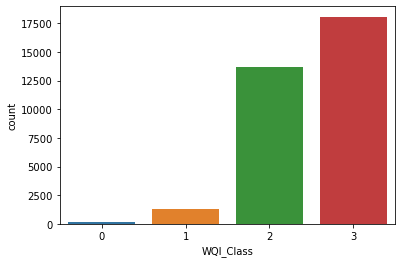

In [98]:
sns.countplot(df['WQI_Class'])

In [99]:
df.dtypes

Temp         float64
SpCond       float64
DO_pct       float64
DO_mgl       float64
Depth        float64
pH           float64
Turb         float64
WQI          float64
WQI_Class      int64
Time          object
Date          object
dtype: object

In [100]:
df

,Temp,SpCond,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class,Time,Date
0,5.2,0.13,101.9,12.9,0.45,6.6,0.012,12.639779,3,00:00:00,2004-01-01
1,5.2,0.12,101.8,12.9,0.45,6.6,0.013,12.636899,3,00:30:00,2004-01-01
2,5.2,0.12,101.8,12.9,0.45,6.6,0.012,12.631159,3,01:00:00,2004-01-01
3,5.1,0.13,101.8,13.0,0.46,6.6,0.013,12.349211,3,01:30:00,2004-01-01
4,5.1,0.13,101.8,13.0,0.46,6.6,0.012,12.343470,3,02:00:00,2004-01-01
...,...,...,...,...,...,...,...,...,...,...,...
33133,4.5,0.20,98.0,12.7,0.47,7.1,0.009,9.647662,3,22:30:00,2006-02-24
33134,4.5,0.20,97.8,12.7,0.47,7.1,0.009,9.643177,3,23:00:00,2006-02-24
33135,4.4,0.20,97.8,12.7,0.47,7.1,0.009,9.627231,3,23:30:00,2006-02-24
33136,4.4,0.20,97.6,12.7,0.46,7.1,0.009,9.622747,3,00:00:00,2006-02-25


In [101]:
col=df.columns
col    

Index(['Temp', 'SpCond', 'DO_pct', 'DO_mgl', 'Depth', 'pH', 'Turb', 'WQI',
       'WQI_Class', 'Time', 'Date'],
      dtype='object')

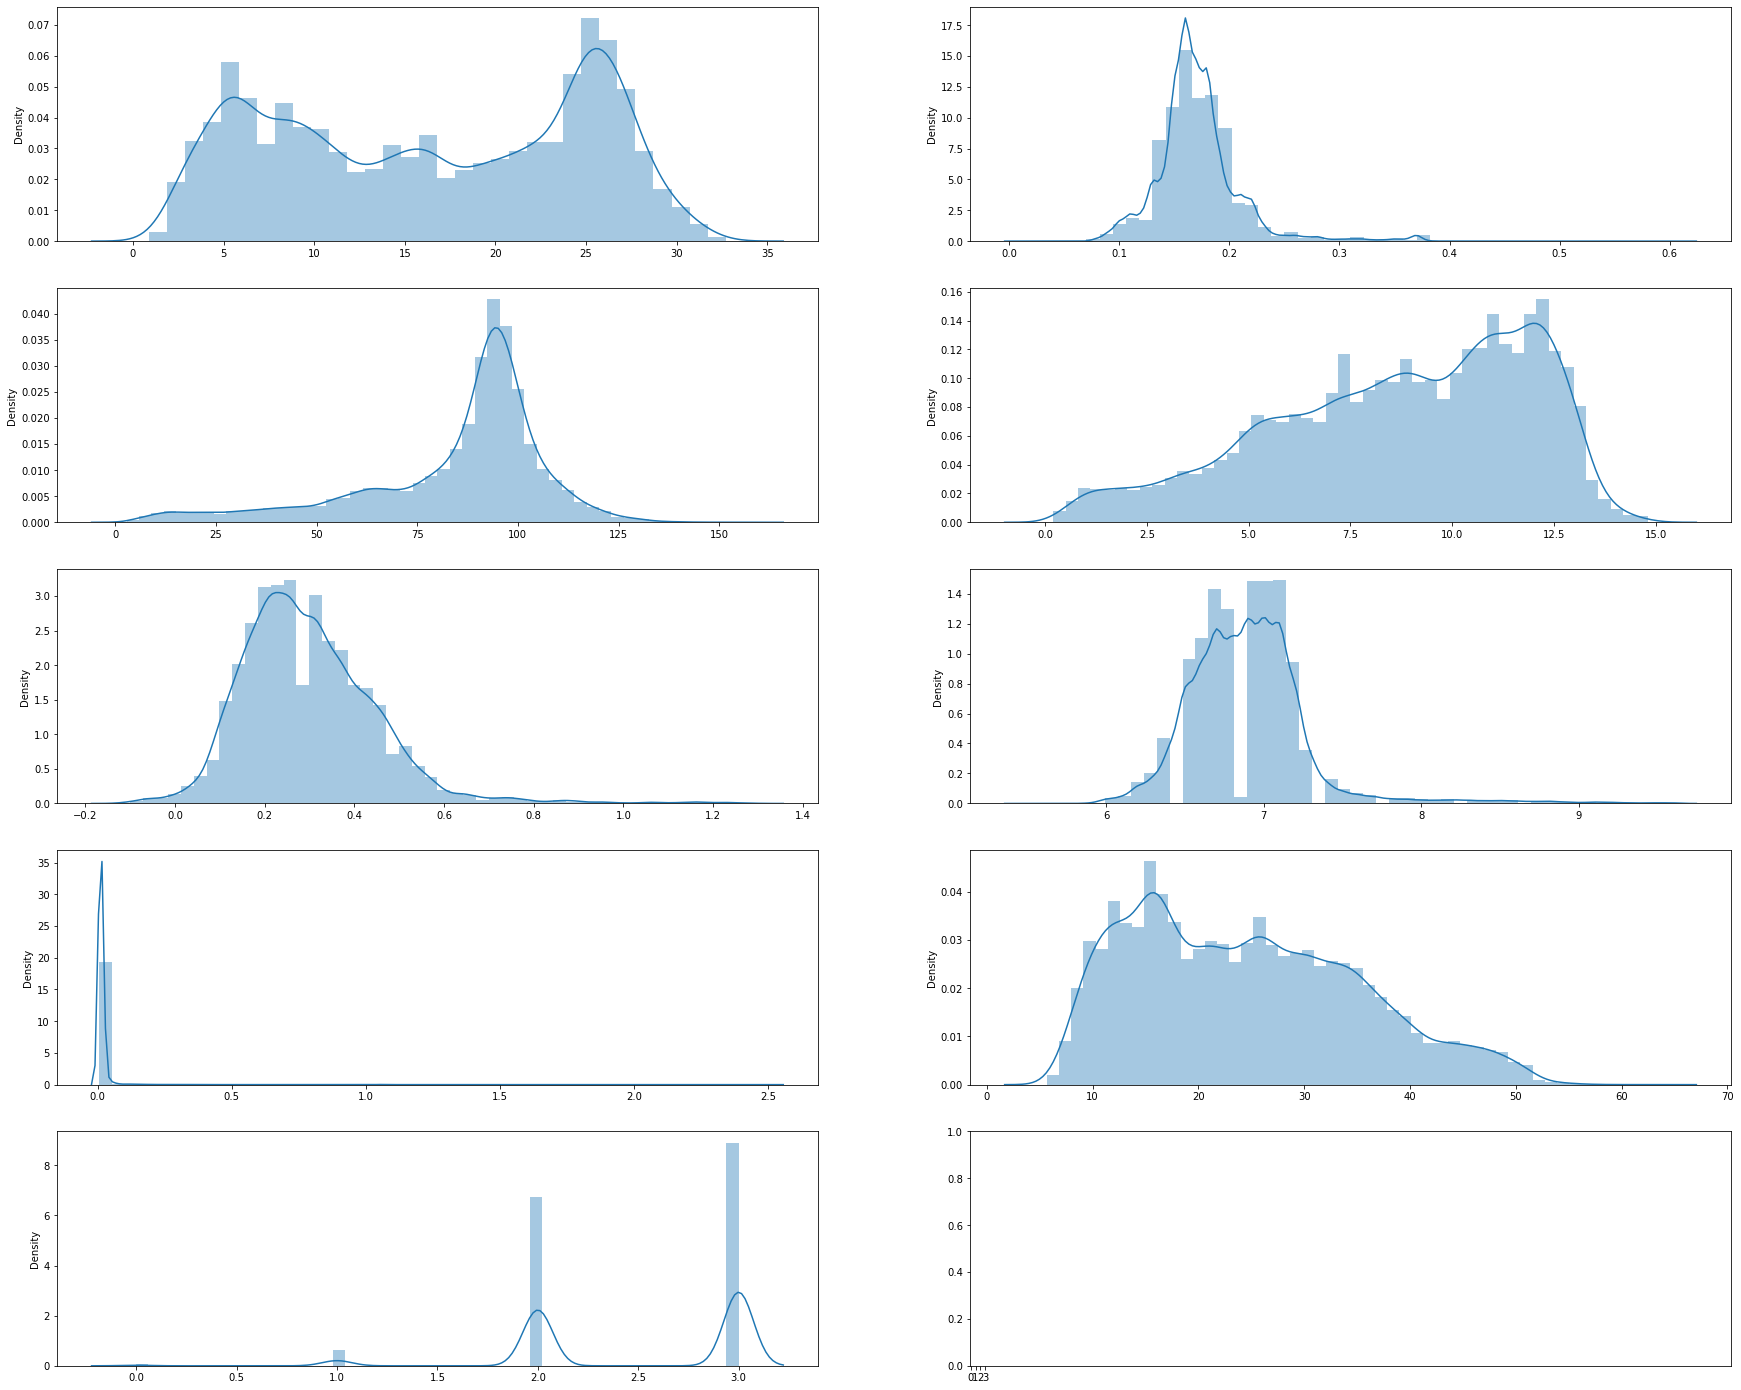

In [103]:
fig,axes=plt.subplots(5,2,figsize=(30,25))
i=0   # row
j=0  # column
for cols in col[:-2]:
    sns.distplot(x=df[cols],ax=axes[i][j])
    plt.xticks(ticks=df[cols].unique())
    
    j+=1
    if j>=2:
        j=0
        if i<5:
            i+=1

# Preprocessing

In [104]:
df[['Hours', 'Minutes', 'Seconds']] = df['Time'].astype(str).str.split(':', expand=True)

In [105]:
df.drop(["Time","Seconds"], axis = 1, inplace=True)

In [106]:
df[["Year","Month","Day"]] = df["Date"].astype(str).str.split('-', expand= True)

In [107]:
df.drop(["Date"], axis = 1, inplace = True)

In [108]:
#df

In [109]:
df["Day"] = df["Day"].astype(int)
df["Hours"] = df["Hours"].astype(int)
df["Minutes"] = df["Minutes"].astype(int)
df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].astype(int)
#train_data['Temp'] = train_data['Temp'].astype('object')

In [110]:
df.head(5)

,Temp,SpCond,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class,Hours,Minutes,Year,Month,Day
0,5.2,0.13,101.9,12.9,0.45,6.6,0.012,12.639779,3,0,0,2004,1,1
1,5.2,0.12,101.8,12.9,0.45,6.6,0.013,12.636899,3,0,30,2004,1,1
2,5.2,0.12,101.8,12.9,0.45,6.6,0.012,12.631159,3,1,0,2004,1,1
3,5.1,0.13,101.8,13.0,0.46,6.6,0.013,12.349211,3,1,30,2004,1,1
4,5.1,0.13,101.8,13.0,0.46,6.6,0.012,12.343470,3,2,0,2004,1,1


In [111]:
#independent variable and dependant variable:
x = df.drop("WQI_Class",axis = 1)
y =  df["WQI_Class"]

<AxesSubplot:xlabel='WQI_Class', ylabel='count'>

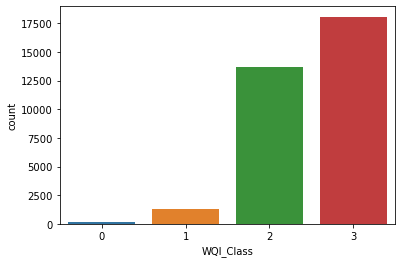

In [112]:
sns.countplot(y)

In [113]:
#from imblearn.combine import SMOTETomek
from collections import Counter 
Counter(y)
from imblearn.over_sampling import SMOTE

In [114]:
os = SMOTE()                                      tp   fp
                                                fn     tn    
x_res,y_res=os.fit_resample(x,y)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [115]:

print("the number of class before fit {}".format(Counter(y)))
print("the number of class after fit {}".format(Counter(y_res)))

the number of class before fit Counter({3: 18056, 2: 13676, 1: 1259, 0: 147})
the number of class after fit Counter({3: 18056, 2: 18056, 1: 18056, 0: 18056})


# Spliting The Dataset

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=2)

In [117]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)

x_train (57779, 13)
x_test (14445, 13)


In [118]:
print('y_train',y_train.shape)
print('y_test',y_test.shape)

y_train (57779,)
y_test (14445,)


# Normalize Data

In [119]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

# Logistic Regression model

In [120]:
#importing the libraries
import pandas as pd
from mord import LogisticAT
from sklearn.preprocessing import StandardScaler
regressor = LogisticAT(alpha=1.0, verbose=0)
regressor.fit(x_train_std,y_train)

LogisticAT()

In [121]:
#predication on Logistic model
y_pred = regressor.predict(x_test_std)
y_pred

array([2, 0, 2, ..., 2, 0, 0])

In [122]:
#Confusion Matrix
log_conf_mat=confusion_matrix(y_pred,y_test)
print(log_conf_mat)
print('\n')
score=accuracy_score(y_pred,y_test)
print(score)

[[3309  329  168    0]
 [ 346  468 1667   13]
 [   2 2800 1762  777]
 [   0    0   17 2787]]


0.5763932156455521


# Fiiting on KNN Model:

In [125]:
##Fitted on knn model:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_std,y_train)
knn_pred=knn.predict(x_test_std)
print("with k = 7")
print('\n')
knn_conf_mat=confusion_matrix(knn_pred,y_test)
print('\n')
print(classification_report(knn_pred,y_test))
print("\n")
score=accuracy_score(knn_pred,y_test)
print(score)

with k = 7




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3672
           1       0.99      0.93      0.96      3815
           2       0.96      0.99      0.97      3484
           3       0.96      0.99      0.98      3474

    accuracy                           0.98     14445
   macro avg       0.98      0.98      0.98     14445
weighted avg       0.98      0.98      0.98     14445



0.9769470404984424


# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

dc= DecisionTreeClassifier()
dc.fit(x_train_std,y_train)
dc_pred = dc.predict(x_test_std)
dc_pred
  

array([1, 0, 2, ..., 1, 0, 0], dtype=int64)

In [127]:
#Accuracy on train is:
y_pred_train = dc.predict(x_train_std)
score_train=accuracy_score(y_pred_train,y_train)
print("Model Accuracy on train is:", score_train)

Model Accuracy on train is: 1.0


In [128]:
print('CONFUSION_MATRIX :\n')

dc_conf_mat = confusion_matrix(dc_pred,y_test)
print(dc_conf_mat)

CONFUSION_MATRIX :

[[3657    0    0    0]
 [   0 3594    2    0]
 [   0    3 3612    0]
 [   0    0    0 3577]]


In [131]:
print('ACCURACY :\n')
#metrics.accuracy_score(prediction,y_test)
score_test=accuracy_score(dc_pred,y_test)
print("Model Accuracy on test is :",score_test)

ACCURACY :

Model Accuracy on test is : 0.9996538594669436


In [132]:
#preprunning:
parameter={
     'criterion':['gini', 'entropy', 'log_loss'],
     'splitter':['best', 'random'],
     'max_depth':[1,2,3,4,5],
     'max_features':['auto', 'sqrt', 'log2'], 
     #'ccp_alpha':[1,2,3,4,5,6,7]
}

In [133]:
dc= DecisionTreeClassifier()
cv = GridSearchCV(dc,param_grid=parameter, cv= 5, scoring ='accuracy')

In [134]:
cv.fit(x_train_std,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [139]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [140]:
#Accuracy on train data:
y_pred_train = cv.predict(x_train_std)
score_train=accuracy_score(y_pred_train,y_train)
print("Model Accuracy on train is:", score_train)

Model Accuracy on train is: 0.9126499247131311


In [141]:
#Accuracy on test data:
y_pred = cv.predict(x_test_std)
score_test=accuracy_score(y_pred,y_test)
print("Model Accuracy on train is:", score_test)


Model Accuracy on train is: 0.9074420214607131


In [54]:
#df

In [142]:
cv.predict([[4.4,0.20,97.5,12.6,0.46,7.1,0.009,9.898625,0,30,2006,2,25]])

array([0], dtype=int64)

In [143]:
true_value = y_test
predicted_value = y_pred
#plt.plot(x, y)

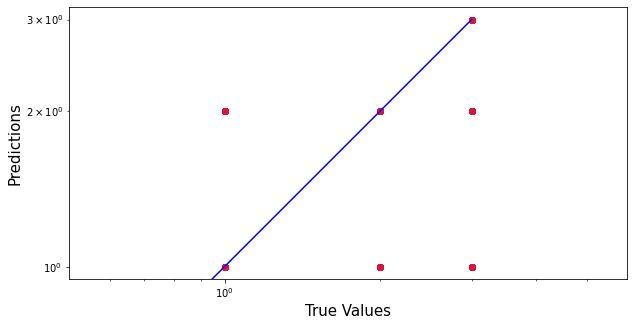

In [144]:
plt.figure(figsize=(10,5))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [145]:
new_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
#new_df

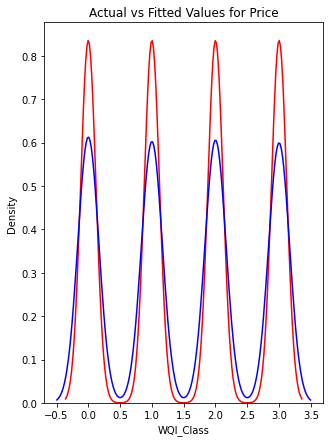

In [146]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_res, hist=False, color="red", label="Actual Value")
sns.distplot(dc_pred, hist=False, color="blue", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

# Random Forest

In [147]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_std,y_train)
forest_pred=rfc.predict(x_test_std)

In [148]:
#print('classification report',classification_report(forest_pred,y_test))
print('\n')
rfc_conf_mat=confusion_matrix(forest_pred,y_test)
print('\n')
print(classification_report(forest_pred,y_test))
print("\n")
score=accuracy_score(forest_pred,y_test)
print(score)





              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3657
           1       1.00      1.00      1.00      3593
           2       1.00      1.00      1.00      3618
           3       1.00      1.00      1.00      3577

    accuracy                           1.00     14445
   macro avg       1.00      1.00      1.00     14445
weighted avg       1.00      1.00      1.00     14445



0.9997230875735549


In [149]:
new_df=pd.DataFrame({'Actual':y_test, 'Predicted':forest_pred})
#new_df

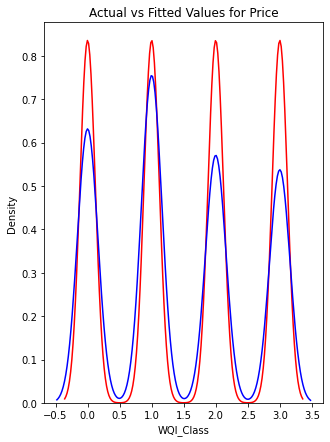

In [150]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_res, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

# load test data set

In [151]:
test_df = pd.read_csv(r"C:\Users\RNARESHD\OneDrive - Capgemini\Desktop\AIML\DS_DF_WQI_Test.csv")
test_df

,SMPLDATETIME,STNCODE,USRCODES,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class
0,25-02-2006 01:00,deldswq,01:00:00,4.4,0.20,0.1,97.5,12.7,0.46,7.1,0.009,9.620504,Excellent
1,25-02-2006 01:30,deldswq,01:30:00,4.3,0.20,0.1,97.5,12.7,0.46,7.1,0.009,9.604559,Excellent
2,25-02-2006 02:00,deldswq,02:00:00,4.3,0.20,0.1,97.3,12.7,0.45,7.1,0.009,9.600074,Excellent
3,25-02-2006 02:30,deldswq,02:30:00,4.3,0.20,0.1,97.2,12.6,0.45,7.1,0.009,9.875953,Excellent
4,25-02-2006 03:00,deldswq,03:00:00,4.3,0.20,0.1,97.1,12.6,0.45,7.1,0.009,9.873710,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14197,31-12-2006 21:30,deldswq,21:30:00,7.7,0.17,0.1,86.9,10.4,0.40,6.9,0.011,16.298147,Excellent
14198,31-12-2006 22:00,deldswq,22:00:00,7.7,0.17,0.1,87.0,10.4,0.40,6.9,0.010,16.294648,Excellent
14199,31-12-2006 22:30,deldswq,22:30:00,7.8,0.17,0.1,86.6,10.3,0.39,6.9,0.010,16.579746,Excellent
14200,31-12-2006 23:00,deldswq,23:00:00,7.8,0.17,0.1,86.6,10.3,0.39,6.9,0.010,16.579746,Excellent


# Preprocessing

In [152]:
test_df['SMPLDATETIME']=pd.to_datetime(test_df['SMPLDATETIME'])

In [153]:
test_df['Time'],test_df['Date']= test_df['SMPLDATETIME'].apply(lambda x:x.time()), test_df['SMPLDATETIME'].apply(lambda x:x.date())
test_df.drop(['SMPLDATETIME','USRCODES','STNCODE','Sal'],axis=1,inplace=True)

In [154]:
test_df[['Hours', 'Minutes', 'Seconds']] = test_df['Time'].astype(str).str.split(':', expand=True)
test_df.drop(["Time","Seconds"], axis = 1, inplace=True)
test_df[["Year","Month","Day"]] = test_df["Date"].astype(str).str.split('-', expand= True)
test_df.drop(["Date"], axis = 1, inplace = True)

In [155]:
test_df["Day"] = test_df["Day"].astype(int)
test_df["Hours"] = test_df["Hours"].astype(int)
test_df["Minutes"] = test_df["Minutes"].astype(int)
test_df["Year"] = test_df["Year"].astype(int)
test_df["Month"] = test_df["Month"].astype(int)

In [156]:
#test_df.isnull().sum()

In [157]:
test_df['WQI_Class'].unique()


array(['Excellent', 'UFC', 'Good', 'Poor'], dtype=object)

In [160]:
test_df['WQI_Class'] = df['WQI_Class'].replace({'Excellent':3,'Good':2,'UFC':1,'Poor':0})

In [161]:
test_df.head()

,Temp,SpCond,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class,Hours,Minutes,Year,Month,Day
0,4.4,0.2,97.5,12.7,0.46,7.1,0.009,9.620504,3,1,0,2006,2,25
1,4.3,0.2,97.5,12.7,0.46,7.1,0.009,9.604559,3,1,30,2006,2,25
2,4.3,0.2,97.3,12.7,0.45,7.1,0.009,9.600074,3,2,0,2006,2,25
3,4.3,0.2,97.2,12.6,0.45,7.1,0.009,9.875953,3,2,30,2006,2,25
4,4.3,0.2,97.1,12.6,0.45,7.1,0.009,9.873710,3,3,0,2006,2,25


In [162]:

test_feature = test_df[['Temp','SpCond','DO_pct','DO_mgl','Depth','pH','Turb','WQI','Hours','Minutes','Year','Month','Day']]

# normalize the test data
test_x = preprocessing.StandardScaler().fit(test_feature).transform(test_feature)
test_x[0:5]

# and target result
test_y = test_df['WQI_Class'].values
test_y[0:5]

array([3, 3, 3, 3, 3], dtype=int64)

In [163]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)
y_pred = reg_model.predict(x_test)
result = reg_model.score(x_test, y_test)
print("Accuracy:",result)
#result = reg_model.score(reg_model_pred,y_test)
#print("Accuracy :", result)
score=accuracy_score(y_pred,y_test)
print("Accuracy of Logistic model:", result)

Accuracy: 0.8387677397023191
Accuracy of Logistic model: 0.8387677397023191


In [164]:
y_pred = reg_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [165]:
dc_model= DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1)
classification = dc_model.fit(x_train,y_train)
prediction = dc_model.predict(x_test)
prediction
test_scores = dc_model.score(x_test,y_test)
print("Accuracy of Decision model: ",test_scores)

Accuracy of Decision model:  0.9996538594669436
